# Model Evaluation for Happiness Prediction

In this notebook, we will assess the performance of our previously trained happiness prediction model using streaming data. The model's effectiveness is evaluated based on various metrics, including Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Percentage Error (MAPE). 

The evaluation will help us understand how well the model generalizes to new data and provides insights into the accuracy of the predictions made for the happiness score. We will visualize the predicted scores against the actual scores to observe the model's performance visually. Additionally, we will analyze the residuals to identify any patterns that may indicate potential areas for improvement in the model.

By leveraging real-time data, we aim to ensure that our predictions remain relevant and accurate, ultimately contributing to a deeper understanding of the factors influencing happiness across different regions and years.


### Set Workdir

In [3]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_dir = os.getenv('WORK_DIR')


sys.path.append(work_dir)

### Important libraries


In [12]:
# Model Load
from src.models.model import HappinessPredictions
from src.database.dbconnection import getconnection
from sqlalchemy.orm import sessionmaker, declarative_base, aliased

# Powerful libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error


### Connect to database

In [6]:
engine = getconnection()
Session = sessionmaker(bind=engine)
session = Session()

Conected successfully to database workshop3!


To begin, we read the `HappinessPredictions` table from the database and stored the results in a DataFrame for further analysis. This DataFrame contains the necessary features, actual scores, and predicted scores, allowing us to evaluate the model's performance effectively.


In [24]:
table = aliased(HappinessPredictions)
query = session.query(table).statement
df = pd.read_sql(query, engine, index_col=None)
df.head()

,id,Economy,Family,Health,Freedom,Trust,Generosity,year,Dystopia,Region_America,Region_Asia,Region_Europe,Region_Oceania,Predited_Score,Score
0,1,0.30800,0.95000,0.39100,0.45200,0.14600,0.22000,2018,1.637304,0,0,0,0,4.259344,4.350
1,2,0.87400,1.28100,0.36500,0.51900,0.06400,0.05100,2018,1.694557,0,0,0,0,4.933329,4.441
2,3,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2016,2.773660,1,0,0,0,5.896584,5.976
3,4,1.15851,0.72368,0.34940,0.28098,0.09314,0.06244,2016,1.453320,0,0,0,0,4.107671,4.121
4,5,1.08754,1.03938,0.61415,0.40425,0.14166,0.15776,2016,3.507330,1,0,0,0,6.763659,6.952


### Evaluate metrics

In [16]:
y_true = df['Score']
y_pred = df['Predited_Score']
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Squared Error (MSE): 0.09924222820561322
R-squared (R2): 0.9205143656615371
Mean Absolute Percentage Error (MAPE): 4.072915022744155%


The evaluation of the happiness prediction model yielded promising results, indicating a strong performance. The Mean Squared Error (MSE) of approximately **0.099** suggests that the average squared difference between the predicted and actual scores is low, indicating that the predictions are quite close to the actual values.

Furthermore, the R-squared (R²) value of **0.921** signifies that the model explains about **92%** of the variance in the happiness scores. This high R² value reflects the model's ability to capture the underlying patterns in the data effectively, making it a reliable predictor of happiness.

Additionally, the Mean Absolute Percentage Error (MAPE) of **4.07%** demonstrates that the model's predictions deviate from the actual scores by an average of just over **4%**. This level of accuracy is satisfactory for many practical applications, indicating that the model can provide useful insights into happiness levels across different regions and years.

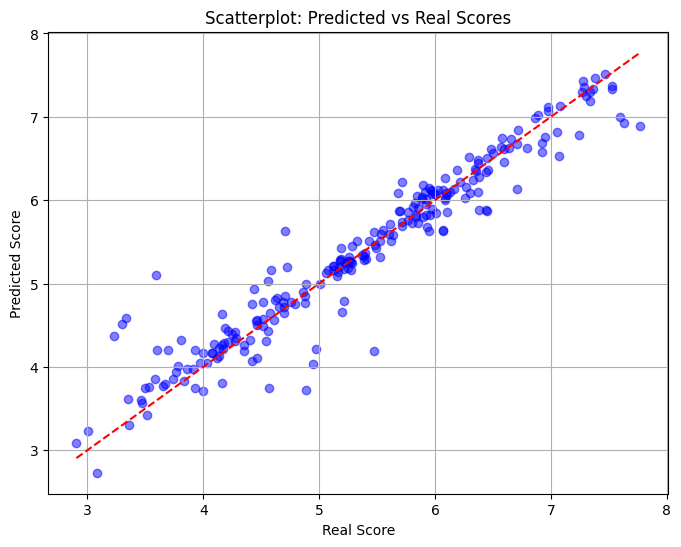

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['Predited_Score'], color='blue', alpha=0.5)
plt.plot([df['Score'].min(), df['Score'].max()], [df['Score'].min(), df['Score'].max()], color='red', linestyle='--')  # Línea de identidad
plt.xlabel('Real Score')
plt.ylabel('Predicted Score')
plt.title('Scatterplot: Predicted vs Real Scores')
plt.grid(True)
plt.show()


A scatter plot was created to compare the real happiness scores against the predicted scores. The results reveal that most data points cluster closely along the red dotted line, which represents the line of identity (where predicted values equal actual values). This alignment indicates that the model performs well in predicting happiness scores for the majority of the dataset.

However, a few data points deviate significantly from this line, suggesting that they may represent outliers or noise within the dataset. These discrepancies could be attributed to various factors

## Residuals

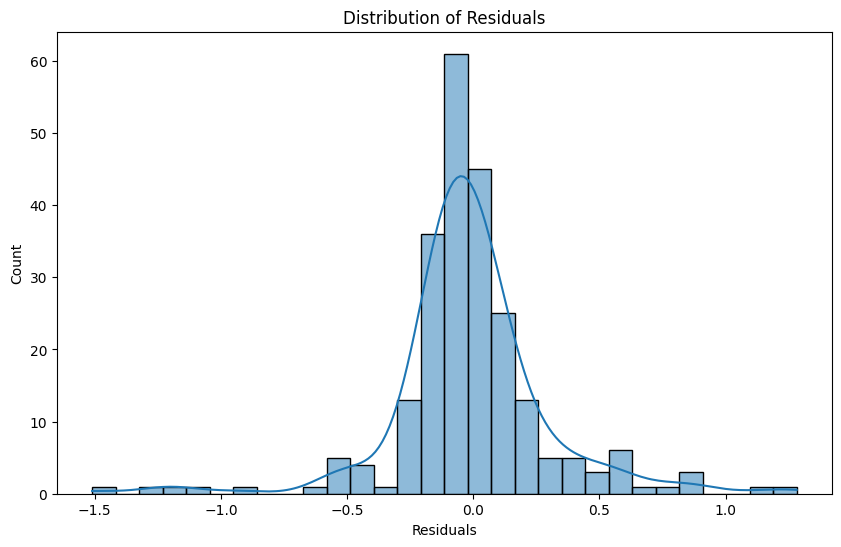

In [15]:
plt.figure(figsize=(10, 6))
residuals = y_true - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

## Residuals Distribution Analysis

A histogram was created to visualize the distribution of residuals from our happiness score prediction model. The results indicate that the residuals appear to follow a normal distribution, which is a positive sign for the validity of our model. Most residuals are concentrated around zero, suggesting that the model’s predictions are generally accurate.

However, there are a few instances of larger residuals, with some reaching values as low as -1.5. These outliers may indicate specific cases where the model's predictions were less accurate, potentially due to unique circumstances affecting happiness scores in those instances.

### Conclusion

Overall, the model demonstrates strong predictive capabilities, explaining approximately 92% of the variance in happiness scores. This level of explained variance is quite impressive, suggesting that our model captures the underlying trends effectively. Despite the presence of some larger residuals, the normal distribution of the residuals and the high R-squared value indicate that the model is robust and reliable for predicting happiness scores. Future improvements could focus on addressing the outliers and refining the model further, but as it stands, it provides valuable insights into the factors influencing happiness across different regions and years.
